## Pandas analysis

This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a couple of FPGAs. Each measurement (i.e. each row of the input file) consists of a flag that specifies the type of message ('HEAD', which in this case is always 1), two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS'). Each TDC count corresponds to 25/30 ns, whereas a unit of BX_COUNTER corresponds to 25 ns, and the ORBIT_CNT is increased every 'x' BX_COUNTER. This allows to store the time in a similar way to hours, minutes and seconds.

In [ ]:
# If you didn't download it yet, please get the relevant file now!
!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ~/data/

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

1\. Create a Pandas DataFrame reading N rows of the 'data_000637.txt' dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k.

In [2]:
#N = 40000
df = pd.read_table("Data/data_000637.txt", sep = ",")#, nrows = N)
print(df)

         HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS
0           1     0          123  3869200167        2374        26
1           1     0          124  3869200167        2374        27
2           1     0           63  3869200167        2553        28
3           1     0           64  3869200167        2558        19
4           1     0           64  3869200167        2760        25
...       ...   ...          ...         ...         ...       ...
1310715     1     0           62  3869211171         762        14
1310716     1     1            4  3869211171         763        11
1310717     1     0           64  3869211171         764         0
1310718     1     0          139  3869211171         769         0
1310719     1     0           61  3869211171         762        18

[1310720 rows x 6 columns]


2\. Find out the number of BX in a ORBIT (the value 'x').

In [3]:
x = df["BX_COUNTER"].max() #(x+1) BX_COUNTER = 1 ORBIT_CNT
print(x)

3563


3\. Find out how much the data taking lasted. You can either make an estimate based on the fraction of the measurements (rows) you read, or perform this check precisely by reading out the whole dataset.

In [4]:
const = 30 #TDC to BX_COUNTER
total = [df.iat[i,3]*(x+1)*const+df.iat[i,4]*const+df.iat[i,5] for i in range(len(df))]

In [5]:
total = np.array(total, dtype=np.float64) #to avoid overflow
print("The data taking lasted {:.5} units of TDC_MEAS.".format(np.sum(total)))

The data taking lasted 5.4224e+20 units of TDC_MEAS.


4\. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information).

In [6]:
absolute_time = [i*(5/6) for i in total]
df.insert(6, "ABS TIME (ns)", absolute_time, True)

In [7]:
df

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,ABS TIME (ns)
0,1,0,123,3869200167,2374,26,3.447457e+14
1,1,0,124,3869200167,2374,27,3.447457e+14
2,1,0,63,3869200167,2553,28,3.447457e+14
3,1,0,64,3869200167,2558,19,3.447457e+14
4,1,0,64,3869200167,2760,25,3.447457e+14
...,...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14,3.447467e+14
1310716,1,1,4,3869211171,763,11,3.447467e+14
1310717,1,0,64,3869211171,764,0,3.447467e+14
1310718,1,0,139,3869211171,769,0,3.447467e+14


5\. Replace the values (all 1) of the HEAD column randomly with 0 or 1.

In [8]:
random = [np.random.randint(0,2) for i in range(len(df))]
df["HEAD"] = random

In [9]:
df

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,ABS TIME (ns)
0,1,0,123,3869200167,2374,26,3.447457e+14
1,1,0,124,3869200167,2374,27,3.447457e+14
2,0,0,63,3869200167,2553,28,3.447457e+14
3,1,0,64,3869200167,2558,19,3.447457e+14
4,0,0,64,3869200167,2760,25,3.447457e+14
...,...,...,...,...,...,...,...
1310715,0,0,62,3869211171,762,14,3.447467e+14
1310716,0,1,4,3869211171,763,11,3.447467e+14
1310717,0,0,64,3869211171,764,0,3.447467e+14
1310718,0,0,139,3869211171,769,0,3.447467e+14


6\. Create a new DataFrame that contains only the rows with HEAD=1.

In [10]:
new_df = df[df.HEAD != 0]

In [11]:
new_df

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,ABS TIME (ns)
0,1,0,123,3869200167,2374,26,3.447457e+14
1,1,0,124,3869200167,2374,27,3.447457e+14
3,1,0,64,3869200167,2558,19,3.447457e+14
6,1,0,61,3869200167,2772,14,3.447457e+14
8,1,0,62,3869200167,2774,21,3.447457e+14
...,...,...,...,...,...,...,...
1310697,1,1,10,3869211170,3525,3,3.447467e+14
1310698,1,0,60,3869211171,9,9,3.447467e+14
1310703,1,0,25,3869211171,20,13,3.447467e+14
1310712,1,1,35,3869211171,429,4,3.447467e+14


7\. Make two occupancy plots (one for each FPGA), i.e. plot the number of counts per TDC channel.

In [12]:
df0 = df[df.FPGA != 1]
df1 = df[df.FPGA != 0]
FPGA0 = np.array([(df0.iat[i,2]) for i in range(len(df0.index))])
FPGA1 = np.array([(df1.iat[i,2]) for i in range(len(df1.index))])

<Figure size 432x288 with 0 Axes>

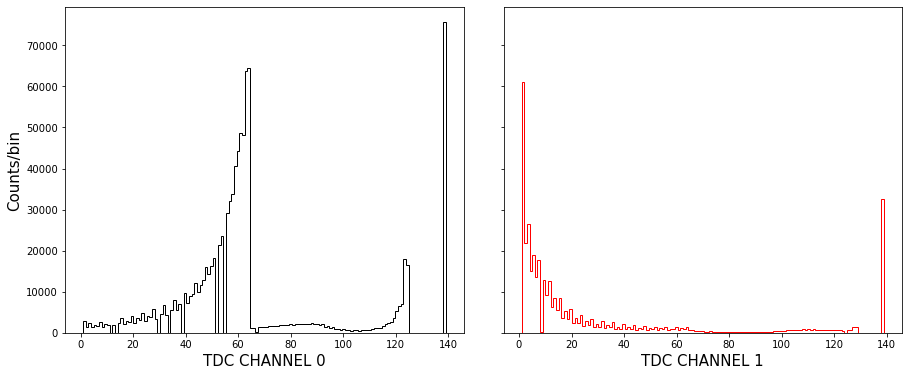

In [13]:
plt.clf()
fig, axes = plt.subplots(nrows=1, ncols=2, tight_layout=False, figsize=(15, 6), sharey=True)
fig.subplots_adjust(wspace=0.1)
ax0, ax1 = axes.flatten()
step0 = (df0["TDC_CHANNEL"].max() - df0["TDC_CHANNEL"].min())
step1 = (df1["TDC_CHANNEL"].max() - df1["TDC_CHANNEL"].min())
data0, bins, __ = ax0.hist(FPGA0, bins=np.linspace(df0["TDC_CHANNEL"].min(),df0["TDC_CHANNEL"].max(),step0), range=(df0["TDC_CHANNEL"].min(), df0["TDC_CHANNEL"].max()), histtype='step', color="black")
ax0.set_xlabel(r"TDC CHANNEL 0", size=15)
ax0.set_ylabel(r"Counts/bin", size=15)
data1, bins, __ = ax1.hist(FPGA1, bins=np.linspace(df1["TDC_CHANNEL"].min(),df1["TDC_CHANNEL"].max(),step1), range=(df1["TDC_CHANNEL"].min(), df1["TDC_CHANNEL"].max()), histtype='step', color="red")
ax1.set_xlabel(r"TDC CHANNEL 1", size=15)
plt.show()

8\. Use the groupby method to find out the noisy channels, i.e. the TDC channels with most counts (say the top 3).

In [14]:
grouped_df = df.groupby("TDC_CHANNEL")

indices = np.array([len(grouped_df.get_group(key)) for key, item in grouped_df])
keys = np.array([key for key, item in grouped_df])
ix = indices.argsort()[-3:][::-1]
print("The TDC channels with most counts are {} with respectively {} counts.".format(keys[ix], indices[ix]))

The TDC channels with most counts are [139  64  63] with respectively [108059  66020  64642] counts.


9\. Count the number of unique orbits. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139.

In [15]:
df.drop_duplicates(subset = "ORBIT_CNT", keep = False)
#no unique orbit with at least one measurement from TDC_CHANNEL=139 if keep = False

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,ABS TIME (ns)
395263,0,0,63,3869204142,3121,15,3.447461e+14
593919,1,0,65,3869206180,3062,9,3.447463e+14


In [16]:
df.drop_duplicates(subset = "ORBIT_CNT", keep = "first").loc[df["TDC_CHANNEL"] == 139]
#203 unique orbits with at least one measurement from TDC_CHANNEL=139 if keep = "first"

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,ABS TIME (ns)
639,0,0,139,3869200174,280,0,3.447457e+14
4744,0,1,139,3869200215,3,0,3.447457e+14
13397,0,0,139,3869200301,501,0,3.447457e+14
13793,1,1,139,3869200305,2,0,3.447457e+14
14395,1,1,139,3869200311,2,0,3.447457e+14
...,...,...,...,...,...,...,...
1285078,1,0,139,3869210999,47,0,3.447467e+14
1288279,0,0,139,3869211022,0,0,3.447467e+14
1291330,1,0,139,3869211041,8,0,3.447467e+14
1296496,1,1,139,3869211078,2,0,3.447467e+14
